*por Jurgen Pulgar Riffo*

# Introducción

El presente trabajo es mi desarrollo para el trabajo individual del ramo Econometría Financiera del Magister en Finanzas 2021
Debido a que no se indicaba un software obligatorio para desarrollar el trabajo, quise autoimponerme el desafio de presentarlo en Jupyter Notebook y utilizar el lenguaje de programación Python para los cálculos, tablas y gráficas solicitadas. Doy fe de que toda la tarea fue desarrollada integramente por mí. 

A continuación se presentan los paquetes de Python utilizados en este trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.stattools import jarque_bera
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf

**Exportación de datos**

Los datos de la tabla corresponden a los tipos de cambio de Chile, Canadá, Australia, Sudáfrica y Nueva Zelandia relativos al dólar de Estados Unidos, y también por los precios de cinco metales básicos no ferrosos: aluminio, cobre, plomo, níquel y estaño. La última serie que compone la base de datos se denomina "LMEX" y corresponde a un índice de precios de metales industriales elaborado por la Bolsa de Metales de Londres.

In [2]:
datos = pd.read_excel('Datos_tarea_individual_econometría_financiera_2021.xlsx')
datos = datos.set_index('Date')
datos.sort_index()
datos

,chile,canada,australia,southafrica,newzealand,aluminum,copper,lead,nickel,tin,lmex
Date,,,,,,,,,,,
1993-12-31,428.50,1.32400,1.47645,3.39780,1.78920,1107.30,1765.50,474.80,5250.00,4851.00,1087.58
1994-01-31,431.55,1.32630,1.40884,3.42230,1.77325,1213.60,1843.80,504.90,5705.00,5222.00,1151.03
1994-02-28,429.15,1.35230,1.39783,3.47180,1.73400,1287.30,1865.50,471.30,5831.00,5449.00,1178.56
1994-03-31,426.55,1.38260,1.42573,3.48080,1.78063,1285.40,1889.00,447.90,5599.00,5404.00,1175.91
1994-04-29,426.25,1.38150,1.40391,3.52050,1.74458,1278.20,1930.80,449.80,5510.00,5373.00,1183.67
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,852.32,1.42335,1.62973,17.86000,1.67884,1492.50,4938.75,1733.71,11434.50,14667.00,2335.30
2020-04-30,835.97,1.38895,1.53586,18.36501,1.63239,1459.00,5160.25,1610.25,12124.25,15274.00,2392.80
2020-05-29,805.20,1.38220,1.49992,17.62950,1.61212,1526.25,5352.25,1655.00,12259.75,15502.85,2470.90


# PREGUNTA 1

Construya el correlograma para cada una de las series que componen la base datos. Haga lo mismo para el logaritmo natural de las series. En función de estos correlogramas, analice la persistencia de las series. ¿Hay grandes diferencias en los correlogramas
de las series en nivel y en logaritmo? Comente.

**Gráficas autocorrelaciones**

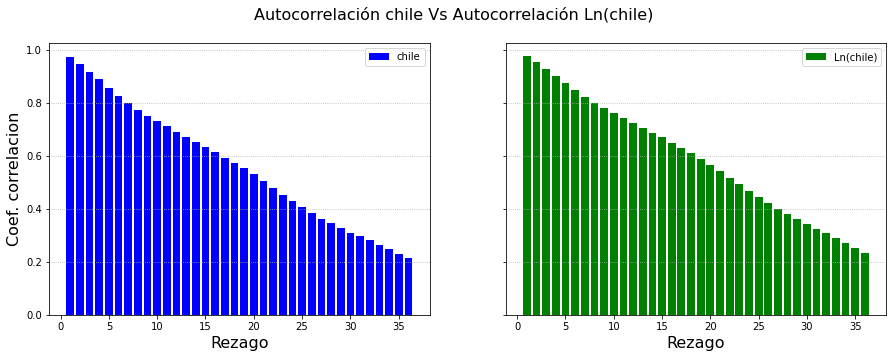

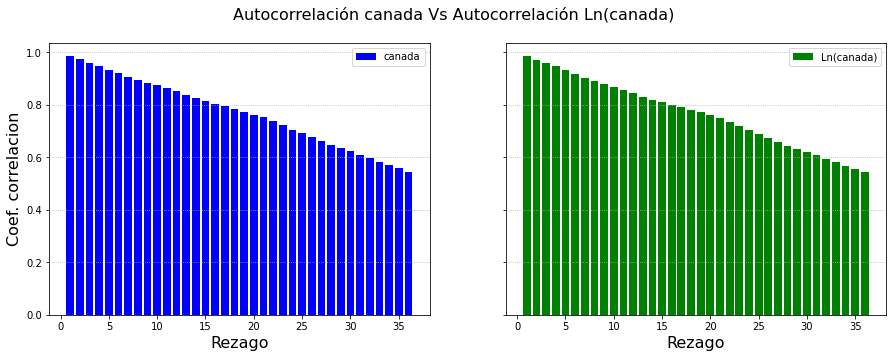

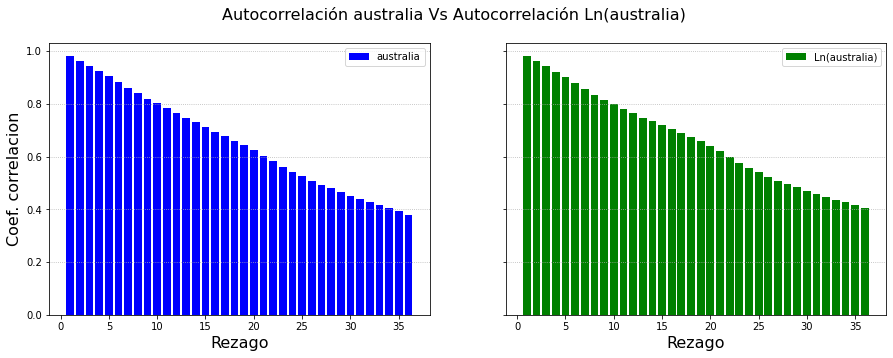

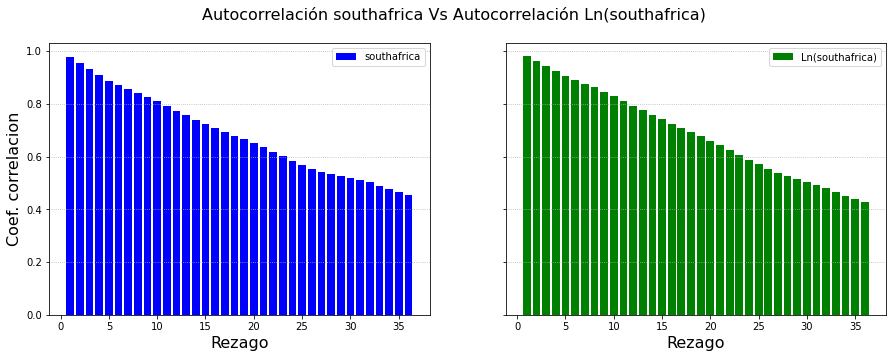

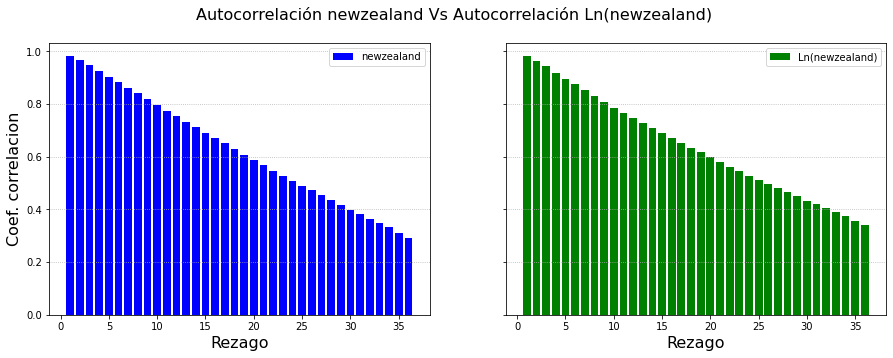

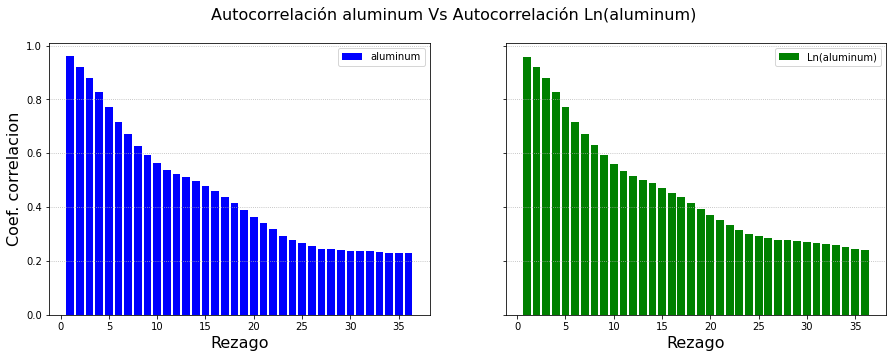

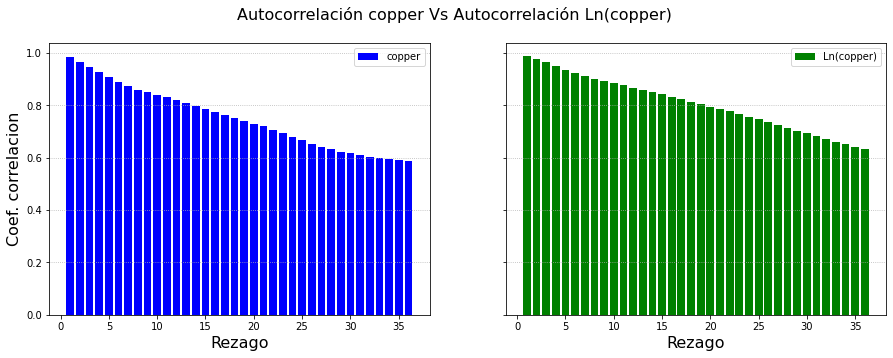

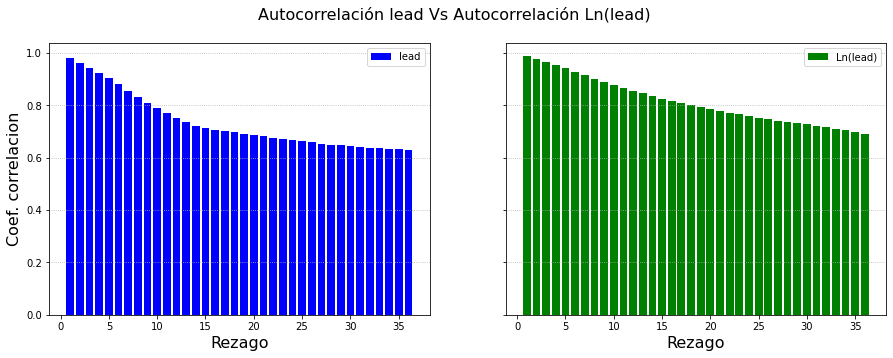

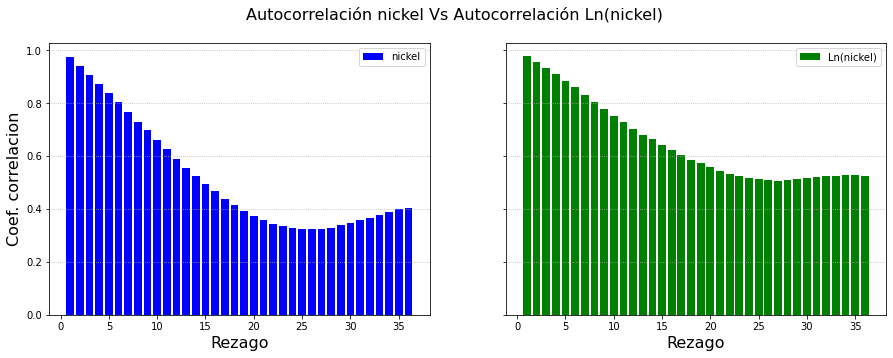

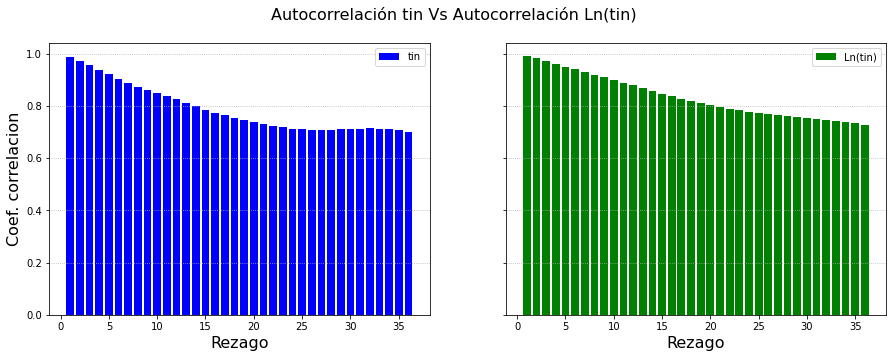

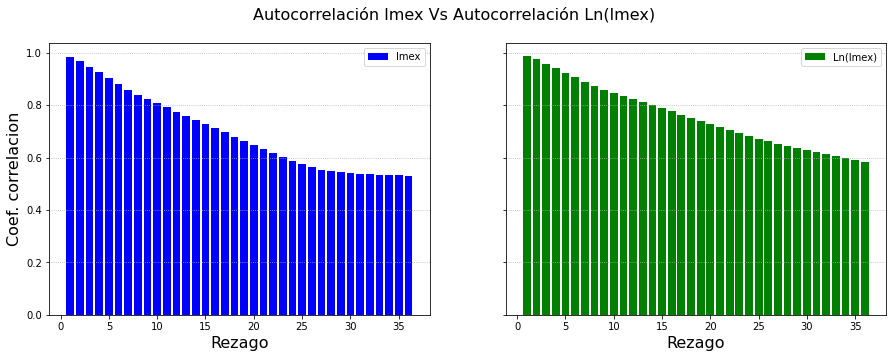

In [3]:
autocorrelaciones = pd.DataFrame()
autocorrelaciones_ln = pd.DataFrame()

n_rez = 36
for i in range(len(datos.columns)):
    corr = acf(datos.iloc[:,i],nlags=n_rez, fft=True)
    corr_ln = acf(np.log(datos.iloc[:,i]),nlags=n_rez, fft=True)
    eje_x = list(range(1,len(corr)))
    eje_y = corr[1::]
    eje_y2 = corr_ln[1::]
    
    fig, ax = plt.subplots(1,2,figsize=(15, 5),sharey=True)

    ax[0].grid(axis='y',linestyle='dotted')
    ax[0].bar(eje_x, eje_y, label= str(datos.columns[i]),color="blue")
    
    ax[1].grid(axis='y',linestyle='dotted')
    ax[1].bar(eje_x, eje_y2, label= 'Ln(' + str(datos.columns[i]) + ')',color="green")

    #ax.set_title('Correlacion simple')
    fig.suptitle('Autocorrelación ' + str(datos.columns[i])+ ' Vs Autocorrelación Ln(' + str(datos.columns[i])+')', fontsize=16)

    ax[0].legend()
    ax[0].set_ylabel('Coef. correlacion',fontsize=16)
    ax[0].set_xlabel('Rezago',fontsize=16)

    ax[1].legend()
    #ax[1].set_ylabel('Coef. correlacion')
    ax[1].set_xlabel('Rezago',fontsize=16)

    #ax.set_title('Correlacion simple')

    #fig.savefig('figura.png')

    plt.show()

    
    autocorrelaciones[datos.columns[i]] = eje_y
    autocorrelaciones_ln[datos.columns[i]] = eje_y2
    

#datos.iloc[:,0]
#datos.columns[5]

En todas las gráficas calculadas encontramos que las gráficas correspondientes a los precios logarítmicos de las series de tiempo presentan una mayor persistencia en el tiempo que las gráficas originales, esto se nota en que las gráficas de los precios logaritmicos poseen una autocorrelación mas estable a través del tiempo (rezagos) que la serie original. En otras palabras, a medida que avanzan los rezagos las series de tiempo de precios logarítmicos tienden a explicar mucho mas a la serie original (son mas autocorrelacionados).

**Tablas autocorrelaciones (rezago máximo=36)**

In [4]:
autocorrelaciones.index=range(1,n_rez+1)
autocorrelaciones

,chile,canada,australia,southafrica,newzealand,aluminum,copper,lead,nickel,tin,lmex
1,0.975610,0.986512,0.981968,0.978931,0.982880,0.961430,0.984886,0.980687,0.975031,0.987117,0.984591
2,0.947764,0.973352,0.962715,0.957141,0.965728,0.921759,0.967105,0.961770,0.942859,0.972627,0.966669
3,0.919340,0.959671,0.944936,0.934247,0.948776,0.880613,0.947635,0.942593,0.907873,0.956601,0.947181
4,0.889973,0.948311,0.924986,0.910023,0.925254,0.828686,0.928329,0.923229,0.872565,0.937522,0.926448
5,0.858182,0.934266,0.904436,0.887475,0.903894,0.771774,0.909902,0.905174,0.839533,0.920331,0.904774
6,0.828172,0.920804,0.884867,0.870984,0.884400,0.717544,0.891124,0.880415,0.806222,0.904633,0.881651
7,0.798905,0.907543,0.861431,0.855497,0.862294,0.670461,0.874862,0.855468,0.765879,0.888104,0.859449
8,0.774174,0.895386,0.840122,0.842295,0.840859,0.628278,0.860768,0.832586,0.730586,0.873855,0.838661
9,0.749650,0.884354,0.820147,0.826132,0.818269,0.594230,0.850249,0.810602,0.697586,0.861985,0.822434
10,0.731404,0.875612,0.802600,0.809465,0.795904,0.564614,0.841602,0.790215,0.661697,0.849764,0.807155


In [5]:
autocorrelaciones_ln.index=range(1,n_rez+1)
autocorrelaciones_ln

,chile,canada,australia,southafrica,newzealand,aluminum,copper,lead,nickel,tin,lmex
1,0.978254,0.985929,0.981876,0.982149,0.981037,0.958931,0.989415,0.988744,0.979190,0.991143,0.987669
2,0.953504,0.972862,0.962423,0.963993,0.962946,0.919408,0.977682,0.977970,0.958156,0.982014,0.974143
3,0.928466,0.958861,0.943720,0.945323,0.944999,0.877802,0.964488,0.966051,0.935321,0.972267,0.958629
4,0.903314,0.946725,0.922118,0.926032,0.919636,0.825986,0.950741,0.953166,0.910522,0.960974,0.941533
5,0.876612,0.931451,0.900466,0.907274,0.897119,0.770475,0.937322,0.940990,0.885345,0.950674,0.923848
6,0.850634,0.917148,0.880012,0.891513,0.877053,0.716310,0.924639,0.927299,0.859855,0.940346,0.906018
7,0.824239,0.903218,0.856279,0.876689,0.853045,0.671145,0.913019,0.914097,0.831702,0.929516,0.889402
8,0.802066,0.890639,0.835357,0.862581,0.830631,0.628965,0.902073,0.901618,0.805070,0.918713,0.873253
9,0.780218,0.878486,0.816009,0.846202,0.807429,0.592237,0.893105,0.889504,0.778745,0.908634,0.859577
10,0.762818,0.869216,0.799518,0.829070,0.785756,0.560029,0.884563,0.877870,0.752168,0.898649,0.846394


# PREGUNTA 2

Construya los retornos logarítmicos a 1 y 12 meses para cada una de las series que componen la base datos. Luego construya el correlograma de cada uno de estos retornos y compárelos entre sí. En función de estos correlogramas, analice la persistencia de las series. ¿Hay grandes diferencias en los correlogramas de los distintos retornos? Comente. Recuerde que los retornos logarítmicos a h-meses se calculan como

$$ 100 [Ln(P_{t}) - Ln(P_{t-h})] $$

**Tablas retornos logarítmicos a 1 mes**

In [6]:
retornos_1 = (np.log(datos) - np.log(datos.shift(1)))*100
retornos_1 

,chile,canada,australia,southafrica,newzealand,aluminum,copper,lead,nickel,tin,lmex
Date,,,,,,,,,,,
1993-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-31,0.709264,0.173565,-4.687389,0.718468,-0.895457,9.166653,4.339472,6.146673,8.311491,7.369560,5.670215
1994-02-28,-0.557687,1.941374,-0.784564,1.436035,-2.238314,5.895585,1.170045,-6.886556,2.184553,4.255164,2.363616
1994-03-31,-0.607691,2.215894,1.976293,0.258896,2.653636,-0.147705,1.251847,-5.092484,-4.060050,-0.829269,-0.225104
1994-04-29,-0.070356,-0.079592,-1.542276,1.134087,-2.045340,-0.561712,2.188684,0.423305,-1.602339,-0.575301,0.657747
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,3.825534,5.859144,5.916762,12.689850,4.866211,-11.625572,-12.872996,-8.472465,-6.373471,-10.353844,-11.002141
2020-04-30,-1.936932,-2.446518,-5.932387,2.788365,-2.805788,-2.270130,4.387277,-7.387417,5.857248,4.055196,2.432387
2020-05-29,-3.750203,-0.487163,-2.367871,-4.087359,-1.249512,4.506248,3.653201,2.741156,1.111396,1.487184,3.211823


**Tablas retornos logarítmicos a 12 meses**

In [7]:
retornos_12 = (np.log(datos) - np.log(datos.shift(12)))*100
retornos_12

,chile,canada,australia,southafrica,newzealand,aluminum,copper,lead,nickel,tin,lmex
Date,,,,,,,,,,,
1993-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-31,22.517096,6.337060,14.542767,21.386076,13.303117,-23.771031,-27.261083,-14.363328,-12.032086,-37.998470,-26.919554
2020-04-30,20.697063,3.200537,7.939182,24.765593,8.582753,-20.054607,-21.948394,-16.783006,-0.059780,-25.654565,-21.211675
2020-05-29,13.002467,2.216542,3.998425,19.146731,5.228888,-14.985928,-8.137483,-8.092542,2.379271,-19.416190,-11.177078


**Correlogramas retornos logarítmicos a 1 y 12 meses**

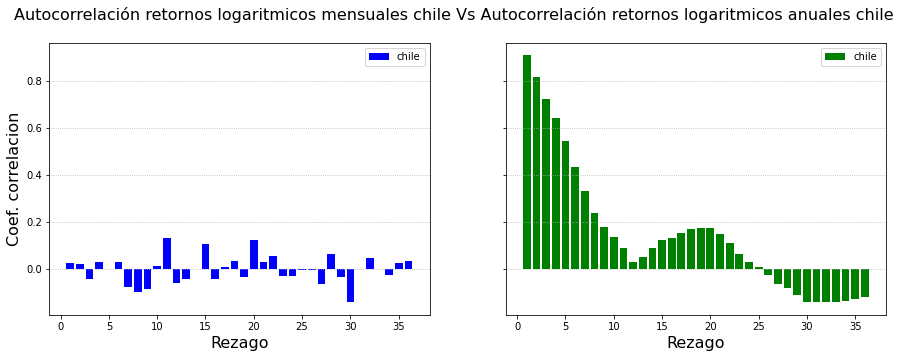

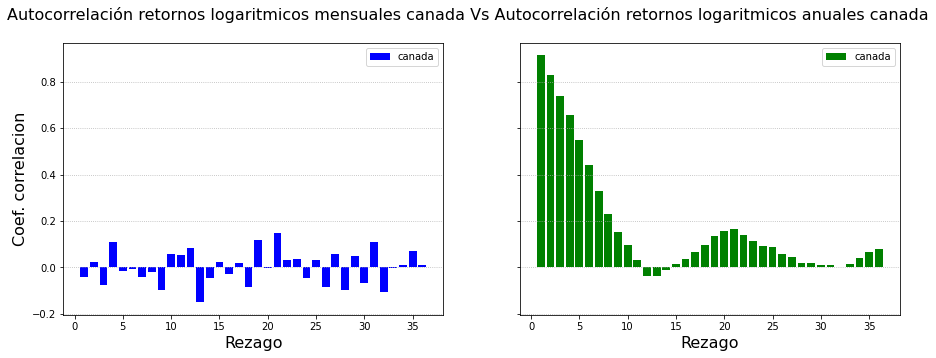

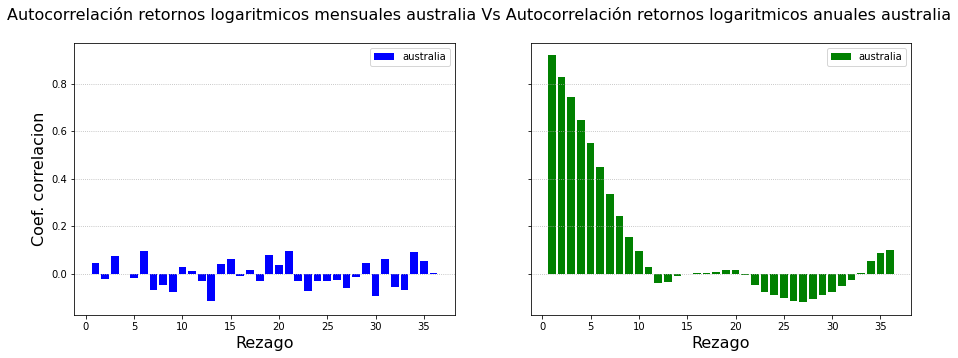

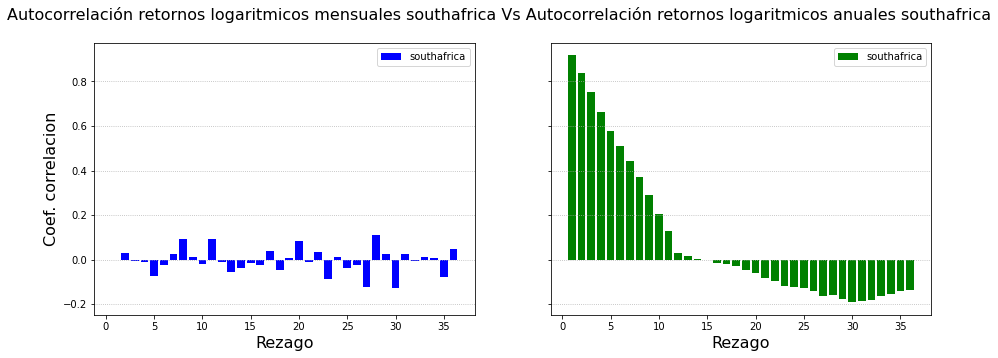

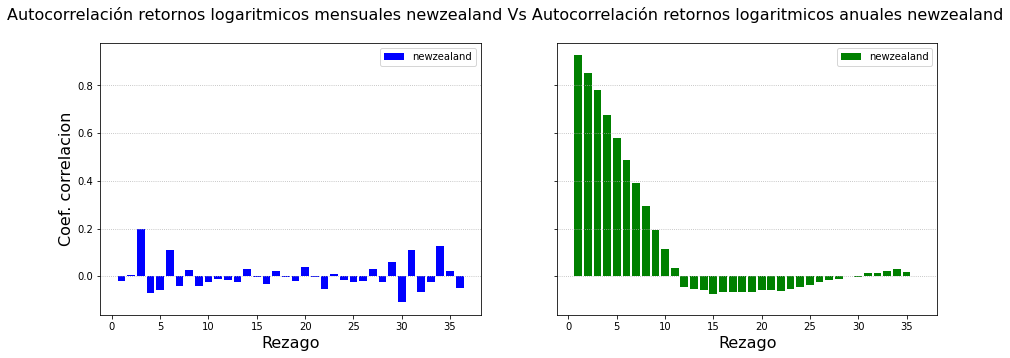

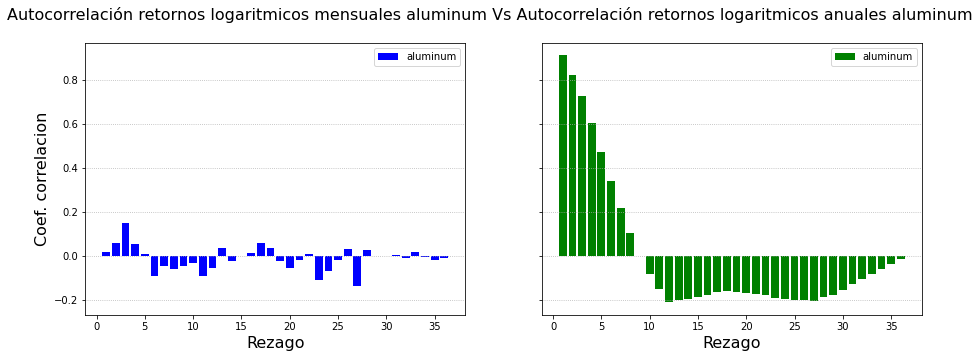

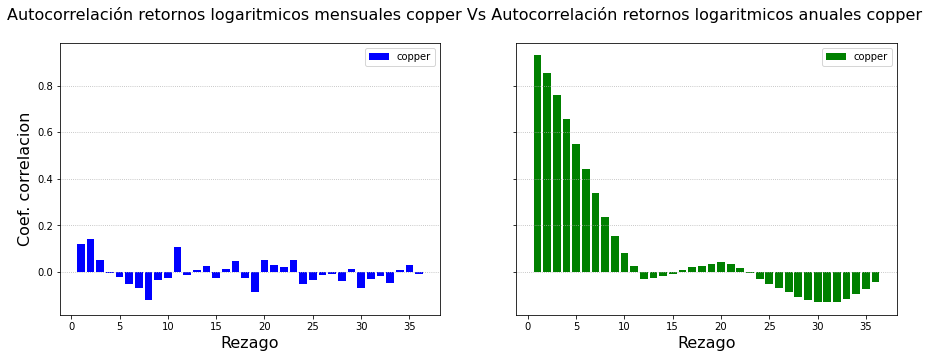

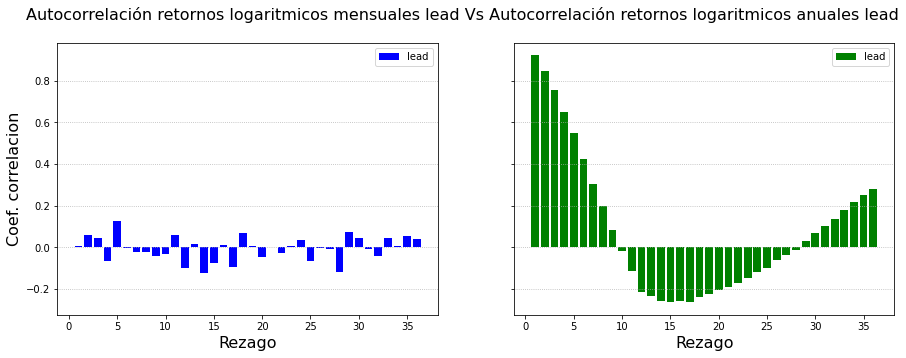

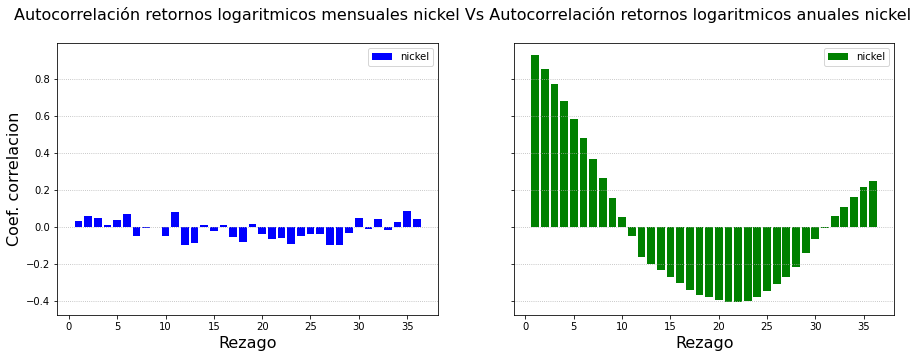

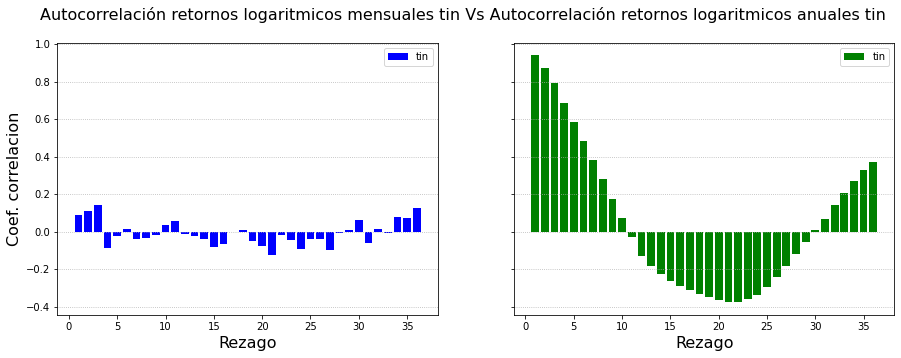

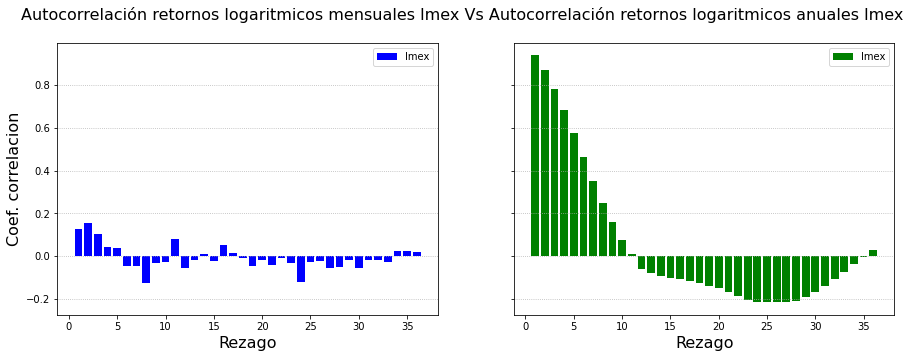

In [8]:
autocorrelaciones_retln_1 = pd.DataFrame()
autocorrelaciones_retln_12 = pd.DataFrame()

retornos_1 = retornos_1.dropna()
retornos_12 = retornos_12.dropna()


for i in range(len(retornos_1.columns)):
    
    corr_retln_1 = acf(retornos_1.iloc[:,i],nlags=n_rez, fft=True)
    corr_retln_12 = acf(retornos_12.iloc[:,i],nlags=n_rez, fft=True)
    
    eje_x = list(range(1,len(corr_retln_1)))
    eje_y = corr_retln_1[1::]
    eje_y2 = corr_retln_12[1::]
    
    fig2, ax = plt.subplots(1,2,figsize=(15, 5),sharey=True)

    ax[0].grid(axis='y',linestyle='dotted')
    ax[0].bar(eje_x, eje_y, label= str(retornos_1.columns[i]),color="blue")
    
    ax[1].grid(axis='y',linestyle='dotted')
    ax[1].bar(eje_x, eje_y2, label= str(retornos_12.columns[i]),color="green")

    #ax.set_title('Correlacion simple')
    fig2.suptitle('Autocorrelación retornos logaritmicos mensuales ' + str(retornos_1.columns[i])+ ' Vs Autocorrelación retornos logaritmicos anuales ' + str(retornos_12.columns[i]), fontsize=16)

    ax[0].legend()
    ax[0].set_ylabel('Coef. correlacion',fontsize=16)
    ax[0].set_xlabel('Rezago',fontsize=16)

    ax[1].legend()
    #ax[1].set_ylabel('Coef. correlacion')
    ax[1].set_xlabel('Rezago',fontsize=16)

    #ax.set_title('Correlacion simple')

    #fig2.savefig('figura2.png')

    plt.show()
    
    autocorrelaciones_retln_1[datos.columns[i]] = eje_y
    autocorrelaciones_retln_12[datos.columns[i]] = eje_y2

**Tablas autocorrelaciones retornos logarítmicos a 1 mes**

In [9]:
autocorrelaciones_retln_1.index=range(1,n_rez+1)
autocorrelaciones_retln_1

,chile,canada,australia,southafrica,newzealand,aluminum,copper,lead,nickel,tin,lmex
1,0.023884,-0.042912,0.046540,-0.002173,-0.019310,0.017037,0.119671,0.004703,0.031457,0.090285,0.125711
2,0.021812,0.024104,-0.023819,0.032344,0.007042,0.055794,0.141632,0.058676,0.059835,0.112281,0.157292
3,-0.043850,-0.076112,0.074104,-0.007291,0.197431,0.149001,0.053859,0.045884,0.046678,0.143746,0.102353
4,0.029986,0.107260,-0.002017,-0.009611,-0.069800,0.053698,-0.002688,-0.065669,0.009343,-0.084345,0.045020
5,0.001770,-0.017026,-0.017187,-0.072641,-0.057810,0.007609,-0.021595,0.128219,0.037039,-0.024965,0.037242
6,0.029068,-0.007734,0.095301,-0.025488,0.108295,-0.091085,-0.050936,-0.002409,0.070010,0.014947,-0.044835
7,-0.075568,-0.043037,-0.070830,0.023494,-0.042796,-0.044647,-0.066234,-0.021214,-0.046967,-0.036584,-0.044523
8,-0.098369,-0.021673,-0.048838,0.093788,0.024838,-0.062652,-0.118153,-0.022375,-0.005536,-0.033777,-0.124836
9,-0.084925,-0.096264,-0.079443,0.011091,-0.041906,-0.046010,-0.034803,-0.043305,-0.001057,-0.017113,-0.030108
10,0.012024,0.056148,0.027347,-0.020366,-0.024671,-0.032159,-0.026782,-0.031966,-0.047203,0.033898,-0.028976


**Tablas autocorrelaciones retornos logarítmicos a 12 meses**

In [10]:
autocorrelaciones_retln_12.index=range(1,n_rez+1)
autocorrelaciones_retln_12

,chile,canada,australia,southafrica,newzealand,aluminum,copper,lead,nickel,tin,lmex
1,0.906802,0.914766,0.920161,0.917084,0.926371,0.912432,0.930053,0.921091,0.928302,0.939580,0.938159
2,0.814529,0.828438,0.827839,0.838922,0.854016,0.821357,0.854275,0.848403,0.852902,0.871376,0.867844
3,0.722504,0.739877,0.745630,0.750926,0.781903,0.727995,0.761974,0.756739,0.771076,0.792002,0.783303
4,0.640665,0.657263,0.649661,0.661560,0.675820,0.605554,0.657505,0.648242,0.679270,0.687293,0.682777
5,0.542006,0.549632,0.550414,0.577578,0.578553,0.470907,0.547939,0.547998,0.585834,0.585495,0.574173
6,0.434303,0.442175,0.448772,0.511962,0.488582,0.338000,0.442245,0.422712,0.481992,0.484492,0.462077
7,0.330434,0.327675,0.337405,0.445107,0.390906,0.218413,0.337733,0.303238,0.367390,0.381532,0.352420
8,0.239560,0.232062,0.241270,0.371554,0.293978,0.103352,0.235788,0.196281,0.263539,0.279748,0.247239
9,0.180001,0.151029,0.156149,0.290016,0.192963,-0.000317,0.153971,0.084475,0.158468,0.174776,0.158580
10,0.134009,0.094647,0.096558,0.206051,0.112352,-0.083885,0.082415,-0.016249,0.052730,0.072897,0.077347


Podemos observar que los retornos logarítmicos a mensuales presentan baja autocorrelación a media que avanzan los rezagos, las cuales se encuentran entre -0,2 y 0,2, por lo que podriamos considerar esta Serie de Tiempo como aleatoria (ruidos blancos). Diferente es lo que ocurre con los retornos logarítmicos a 12 meses, en que todas las gráficas presentan correlaciones altas y con alternaciones (correlaciones positivas y negativas). Según la característica de las gráficas de los retornos logarítmicos a 12 meses podríamos llegar a indicar que son series de tiempo con estacionalidad. 

# PREGUNTA 3

Construya los histogramas de los retornos construídos en la parte 2 y analice si son consistentes con supuestos de normalidad.

**Histogramas**

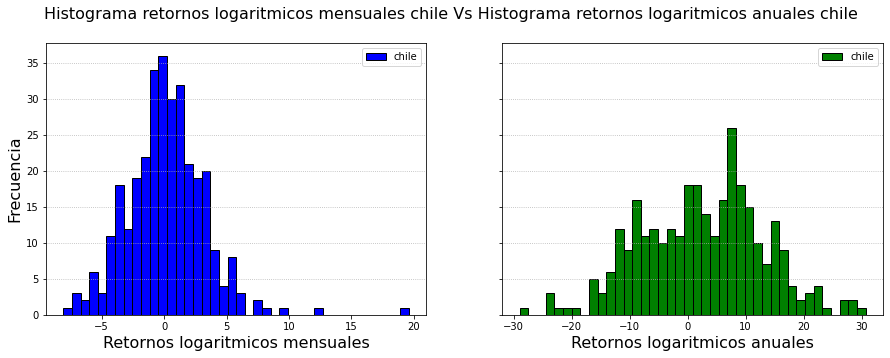

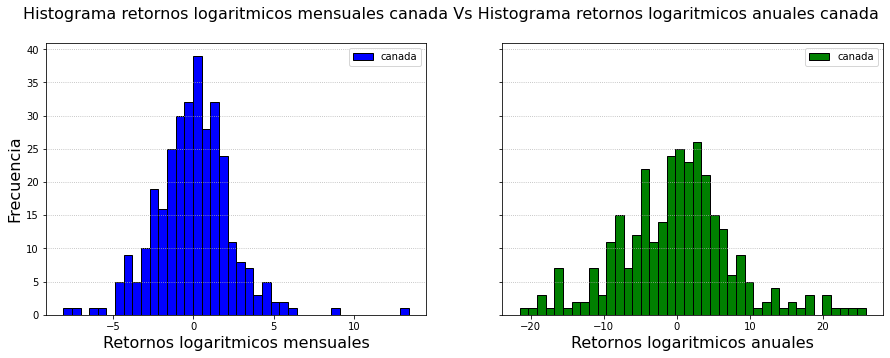

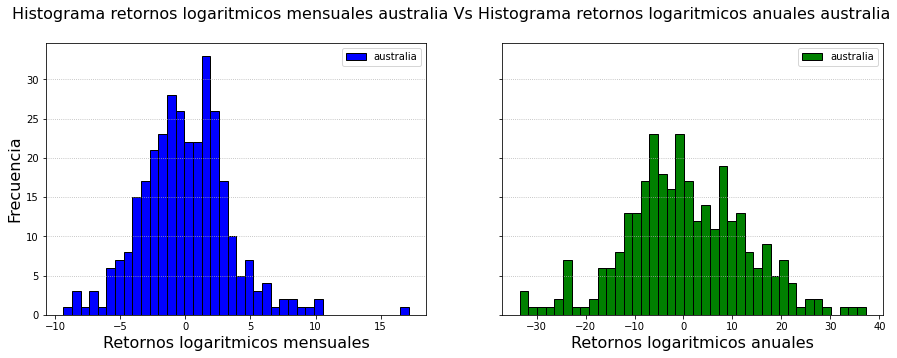

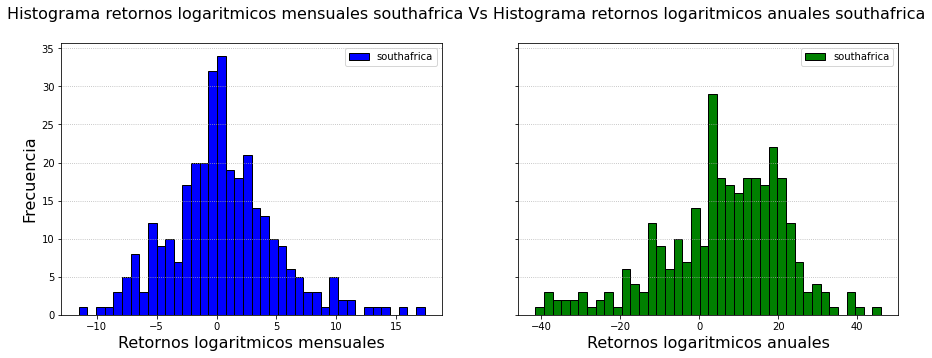

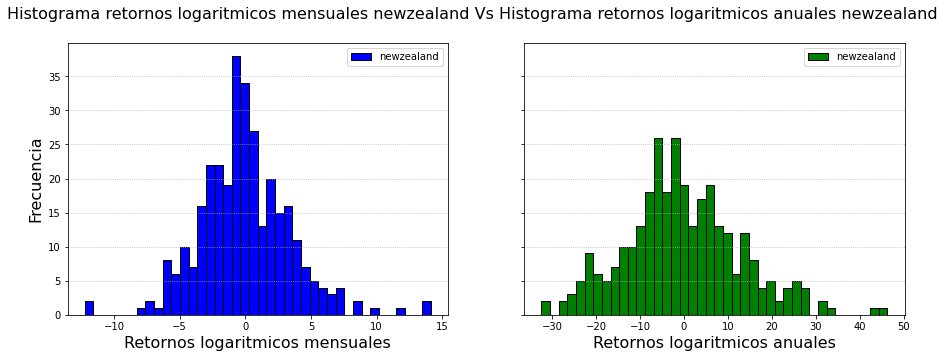

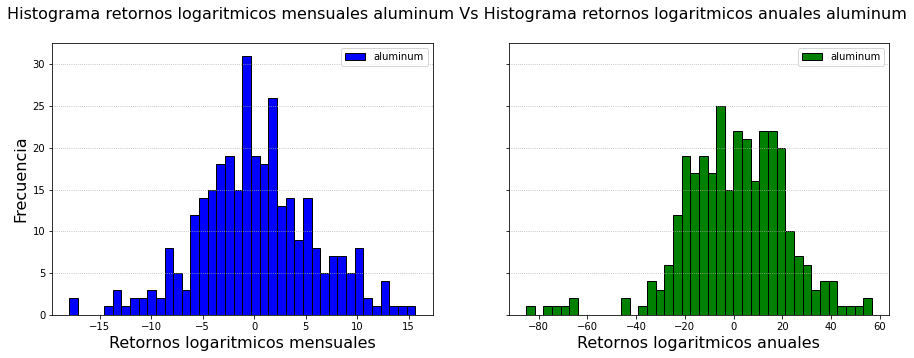

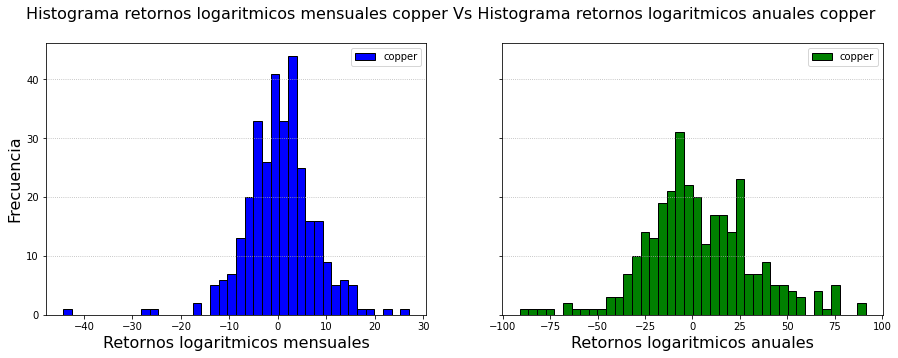

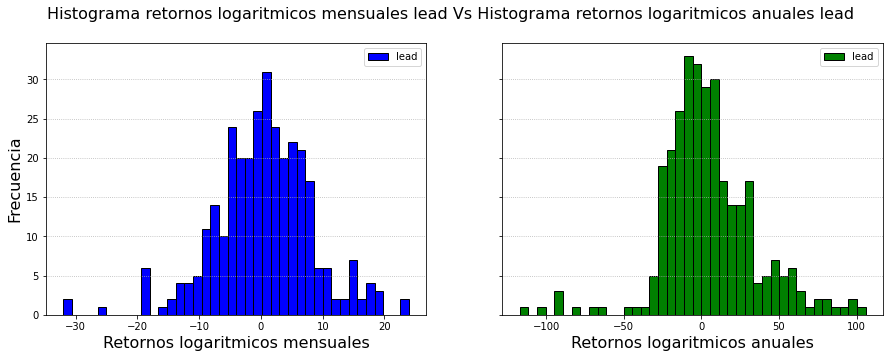

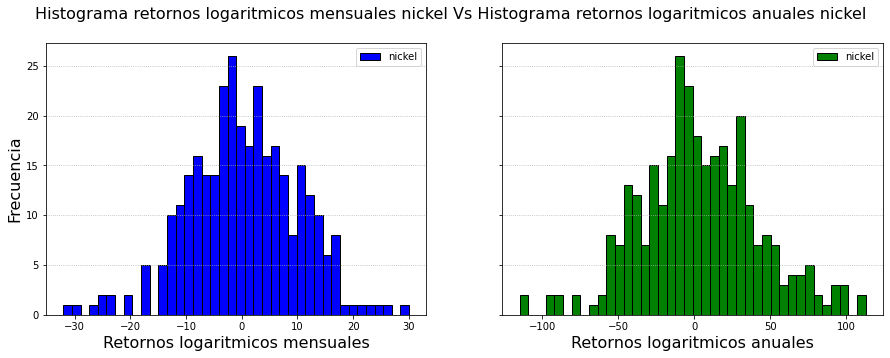

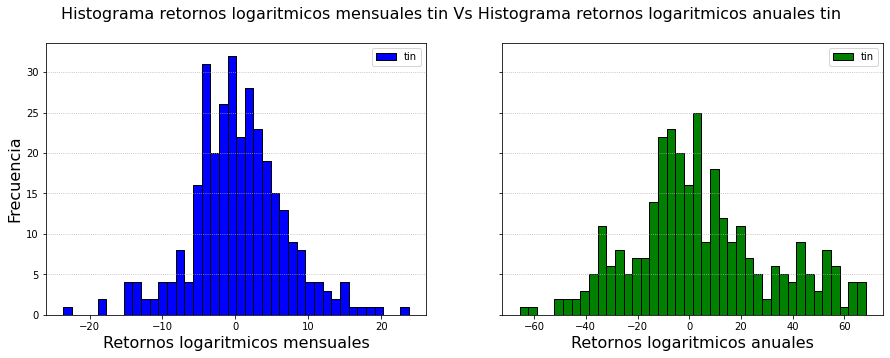

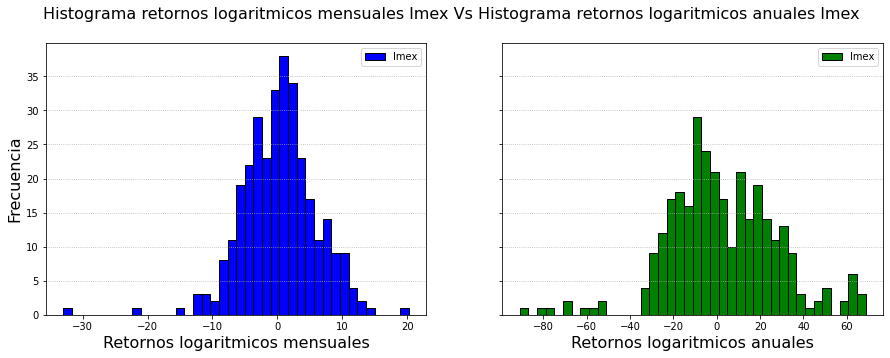

In [11]:
for i in range(len(retornos_1.columns)):    
    
    fig3, ax = plt.subplots(1,2,figsize=(15, 5),sharey=True)

    ax[0].grid(axis='y',linestyle='dotted')
    ax[0].hist(retornos_1.iloc[:,i],label= str(retornos_1.columns[i]),color='blue',edgecolor = 'black',bins = 40)
    
    ax[1].grid(axis='y',linestyle='dotted')
    ax[1].hist(retornos_12.iloc[:,i],label= str(retornos_12.columns[i]),color='green',edgecolor = 'black',bins = 40)

    #ax.set_title('Correlacion simple')
    fig3.suptitle('Histograma retornos logaritmicos mensuales ' + str(retornos_1.columns[i])+ ' Vs Histograma retornos logaritmicos anuales ' + str(retornos_12.columns[i]), fontsize=16)

    ax[0].legend()
    ax[0].set_ylabel('Frecuencia',fontsize=16)
    ax[0].set_xlabel('Retornos logaritmicos mensuales',fontsize=16)

    ax[1].legend()
    #ax[1].set_ylabel('Coef. correlacion')
    ax[1].set_xlabel('Retornos logaritmicos anuales',fontsize=16)


    #fig2.savefig('figura2.png')

    plt.show()

**Prueba de normalidad Jarque Bera y otros parámetros relevantes para determinar normalidad: Retornos logarítmicos a 1 mes**

In [12]:
jb_1 = jarque_bera(retornos_1)
jb_1 = pd.DataFrame(columns = retornos_1.columns,index = ['jb','p-value','skew','kurtosis'],data = jb_1).T
jb_1

,jb,p-value,skew,kurtosis
chile,337.099413,6.306560e-74,0.897597,7.705209
canada,191.016592,3.321040e-42,0.541252,6.633089
australia,75.343689,4.358386e-17,0.504692,5.156302
southafrica,25.323092,3.170739e-06,0.480749,3.990307
newzealand,57.331446,3.553323e-13,0.405387,4.912063
aluminum,2.016126,3.649251e-01,-0.039897,3.381204
copper,375.333144,3.143716e-82,-0.692618,8.130239
lead,41.523146,9.624170e-10,-0.336009,4.634745
nickel,2.922595,2.319352e-01,-0.140470,3.375439
tin,23.526064,7.787178e-06,0.072656,4.322449


**Prueba de normalidad Jarque Bera y otros parámetros relevantes para determinar normalidad: Retornos logarítmicos a 12 meses**

In [13]:
jb_12 = jarque_bera(retornos_12)
jb_12 = pd.DataFrame(columns = retornos_12.columns,index = ['jb','p-value','skew','kurtosis'],data = jb_12).T
jb_12

,jb,p-value,skew,kurtosis
chile,0.764148,6.824445e-01,-0.078882,2.813843
canada,12.684985,1.759910e-03,0.206137,3.904694
australia,0.558782,7.562440e-01,0.018867,3.205226
southafrica,23.675689,7.225857e-06,-0.636639,3.472885
newzealand,9.184690,1.012908e-02,0.367086,3.420335
aluminum,59.187199,1.404957e-13,-0.566451,4.824423
copper,9.855096,7.244245e-03,0.140394,3.830113
lead,75.168789,4.756690e-17,0.045947,5.418442
nickel,1.996180,3.685828e-01,0.098247,3.341959
tin,6.632809,3.628306e-02,0.346945,2.811957


De los histogramas calculados podemos notar que para cada serie, tanto los retornos logarítmicos mensuales y los retornos logarítmicos a 12 meses presentan características de normalidad. Gráficamente se puede observar, que la gran mayoría de los histogramas de los retornos logarítmicos a 1 mes presentan gráficas leptocúrticas, lo que se comprueba en los estadísticos calculados en las tablas anteriores (curtosis>3). Los retornos logarítmicos a 12 meses presentan gráficas mas cercanas en temas de curtosis a una normal, pero tienden a ser asimétricas (con sesgo). La gran mayoría de ambas gráficas (retornos logarítmicos a 1 mes y retornos logarítmicos a 12 meses) tienen colas anchas y outliers del punto de vista de una histograma de datos normales. Del test de Jarque Bera, que tiene por objetivo verificar si las gráficas presentan curtósis y asimetría de una distribución normal, nos lleva a concluir que estas gráficas no presentan dicha característica, dado que los valor-p del test para cada serie son menores a la significancia autoimpuesta del 0,05. 

En conclusión, los histogramas nos indican que estas series presentan características de una distribución normal, pero presentan problemas con la curtósis y la asimetría.

# PREGUNTA 4

En base al paper "Forecasting Base Metal Prices with Commodity Currencies" estime regresiones del siguiente tipo:

$$ \Delta ln(CP_t) = c + \beta [\Delta ln(ER_{t-1}) + \Delta ln(ER_{t-2})]+\rho \Delta ln (CP_{t-1}) + \epsilon_t $$

en que $CP_t$ denota al precio de un commodity genérico en la base de datos (incluyendo al LMEX) mientras que $ER_t$ representa al tipo de cambio chileno. Recuerde usar errores estándar HAC en su estimación. ¿Qué puede concluir acerca de la capacidad predictiva del tipo de cambio chileno para los commodities de la base? ¿Podría dar usted una interpretación causal a sus resultados? Comente.

**Regresiones $\Delta ln(CP_t)$ considerando tipo de cambio chileno, con errores HAC**

XCL = Variablesdel tipo de cambio chileno

XCM = Variable commoditie

In [14]:
pais_moneda = 'chile'

ln_clp_1 = np.log(datos[pais_moneda].shift(1)) - np.log(datos[pais_moneda].shift(2))
ln_clp_1 = ln_clp_1.dropna()
ln_clp_1 = ln_clp_1.drop(ln_clp_1.index[[0]])
#ln_clp_1 

ln_clp_2 = np.log(datos[pais_moneda].shift(2)) - np.log(datos[pais_moneda].shift(3))
ln_clp_2 = ln_clp_2.dropna()
#ln_clp_2

clp_var = ln_clp_1 + ln_clp_2
clp_var.name = 'XCL'

comm_prices = ['aluminum','copper','lead','nickel','tin','lmex']

for i in comm_prices:
    ln_com_price = np.log(datos[i]) - np.log(datos[i].shift(1))
    ln_com_price = ln_com_price.dropna()
    ln_com_price = ln_com_price.drop(ln_com_price.index[[0,1]])
    ln_com_price.name = f'Y_{i}'
    
    
    ln_com_price_1 = np.log(datos[i].shift(1)) - np.log(datos[i].shift(2))
    ln_com_price_1 = ln_com_price_1.dropna()
    ln_com_price_1 = ln_com_price_1.drop(ln_com_price_1.index[[0]])
    ln_com_price_1.name = 'XCM'
    
    data_reg = pd.concat([clp_var,ln_com_price,ln_com_price_1], axis=1)
 
    
    reg = smf.ols(formula = f"Y_{i}~XCL+XCM",data=data_reg).fit(cov_type='HAC',cov_kwds={'maxlags':5},use_t=True)
    
    print(reg.summary())
    print()
    print()
    print()
    print()

                            OLS Regression Results                            
Dep. Variable:             Y_aluminum   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     4.903
Date:                Fri, 03 Sep 2021   Prob (F-statistic):            0.00800
Time:                        16:34:33   Log-Likelihood:                 469.38
No. Observations:                 317   AIC:                            -932.8
Df Residuals:                     314   BIC:                            -921.5
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.003      0.572      0.5

La capacidad predictiva del tipo de cambio chileno se extrae del valor-p de la variable XCL en el modelo, la cual debería ser menor al nivel de significancia del 5%, ya que la hipotesis nula indica que el parámetro de la variable es igual a cero, y la hipótesis alternativa que el parámetro de la variable es significativamente distinto de cero. Buscamos rechazar (valor-p < 5%).

Sobre la capacidad predictiva del tipo de cambio chileno para los commodities aluminio, cobre y estaño podemos decir que este es significativo para su respectivo modelo (valor-p < 5%). Para el commoditie plomo y niquel no se rechaza Ho, por lo que podemos afirmar que el tipo de cambio no es relevante para predecir a dichos commodities. Respecto del rezago considerado para el commoditie, este en todos los casos no es significativo para el modelo (valor-p > 5%)

Según los modelos calculados, puedo afirmar que ante un cambio en el tipo de cambio chileno, el precio de alumnio, cobre y estaño varía según este cambio en el tipo de cambio. Estas conclusiones nos lleva a interpretaciones causales, a pesar que una regresión no tiene ninguna característica inherentemente causal. Como una regresión mide principalmente relaciones predictivas, a veces es posible dar una interpretación causal a los coeficientes calculados, pero no es posible generalizar respecto de esto último.  En el caso particular del cobre, esto tiene sentido al considerar el régimen de tipo de cambio flotante que tiene Chile, y el hecho de que el cobre representa alrededor de la mitad de las exportaciones chilenas y casi el 45% de la Inversión Extranjera Directa.


# PREGUNTA 5

Estime nuevamente las regresiones de la parte anterior, pero esta vez utilizando otro de tipo de cambio a vuestra elección dentro de la base de datos. Recuerde usar errores estándar HAC en su estimación. ¿Qué puede concluir acerca de la capacidad predictiva del tipo de cambio escogido para los commodities de la base? Podría dar usted una interpretación causal a sus resultados? Comente.

**Regresiones $\Delta ln(CP_t)$ considerando tipo de cambio neozelandés, con errores HAC**

In [15]:
pais_moneda = 'newzealand'

ln_clp_1 = np.log(datos[pais_moneda].shift(1)) - np.log(datos[pais_moneda].shift(2))
ln_clp_1 = ln_clp_1.dropna()
ln_clp_1 = ln_clp_1.drop(ln_clp_1.index[[0]])
#ln_clp_1 

ln_clp_2 = np.log(datos[pais_moneda].shift(2)) - np.log(datos[pais_moneda].shift(3))
ln_clp_2 = ln_clp_2.dropna()
#ln_clp_2

clp_var = ln_clp_1 + ln_clp_2
clp_var.name = 'XNZ'

comm_prices = ['aluminum','copper','lead','nickel','tin','lmex']

#reg_tot = []

for i in comm_prices:
    ln_com_price = np.log(datos[i]) - np.log(datos[i].shift(1))
    ln_com_price = ln_com_price.dropna()
    ln_com_price = ln_com_price.drop(ln_com_price.index[[0,1]])
    ln_com_price.name = f'Y_{i}'
    
    
    ln_com_price_1 = np.log(datos[i].shift(1)) - np.log(datos[i].shift(2))
    ln_com_price_1 = ln_com_price_1.dropna()
    ln_com_price_1 = ln_com_price_1.drop(ln_com_price_1.index[[0]])
    ln_com_price_1.name = 'XCM'
    
    data_reg = pd.concat([clp_var,ln_com_price,ln_com_price_1], axis=1)
 
    
    reg = smf.ols(formula = f"Y_{i}~XNZ+XCM",data=data_reg).fit(cov_type='HAC',cov_kwds={'maxlags':5},use_t=True)
    
    print(reg.summary())
    print()
    print()
    print()
    print()
    

                            OLS Regression Results                            
Dep. Variable:             Y_aluminum   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.417
Date:                Fri, 03 Sep 2021   Prob (F-statistic):             0.0908
Time:                        16:34:33   Log-Likelihood:                 467.25
No. Observations:                 317   AIC:                            -928.5
Df Residuals:                     314   BIC:                            -917.2
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0007      0.003      0.217      0.8

[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 5 lags and without small sample correction




                            OLS Regression Results                            
Dep. Variable:                 Y_lmex   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                    0.7450
Date:                Fri, 03 Sep 2021   Prob (F-statistic):              0.476
Time:                        16:34:33   Log-Likelihood:                 455.91
No. Observations:                 317   AIC:                            -905.8
Df Residuals:                     314   BIC:                            -894.5
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

La capacidad predictiva del tipo de cambio neozelandés se extrae del valor-p de la variable XNZ en el modelo, la cual debería ser menor al nivel de significancia del 5%, ya que la hipotesis nula indica que el parámetro de la variable es igual a cero, y la hipótesis alternativa que el parámetro de la variable es significativamente distinto de cero. Buscamos rechazar (valor-p < 5%).

Sobre la capacidad predictiva del tipo de cambio neozelandés para todos los commodities de la base podemos decir que no se rechaza Ho, por lo que podemos afirmar que el tipo de cambio no es relevante para predecir a dichos commodities. Respecto del rezago considerado para el commoditie, este en todos los casos no es significativo para el modelo (valor-p > 5%)

La interpretación causal que se podría dar de esto es (considerando lo mencionado sobre la causalidad en la pregunta anterior) que Nueva Zelanda no destaca por exportar ninguno de estos commodities al extranjero, por lo que su tipo de cambio es indiferente para predecir cambios en los precios de dichos commodities.

# PREGUNTA 6

Repita sus estimaciones de la parte 4 utilizando el tipo de cambio chileno, pero esta vez sin usar errores estándar HAC. Reporte y explique las diferencias que usted encuentra entre ambos sets de estimaciones (con y sin HAC).

**Regresiones $\Delta ln(CP_t)$ considerando tipo de cambio chileno, sin errores HAC**

In [16]:
pais_moneda = 'chile'

ln_clp_1 = np.log(datos[pais_moneda].shift(1)) - np.log(datos[pais_moneda].shift(2))
ln_clp_1 = ln_clp_1.dropna()
ln_clp_1 = ln_clp_1.drop(ln_clp_1.index[[0]])
#ln_clp_1 

ln_clp_2 = np.log(datos[pais_moneda].shift(2)) - np.log(datos[pais_moneda].shift(3))
ln_clp_2 = ln_clp_2.dropna()
#ln_clp_2

clp_var = ln_clp_1 + ln_clp_2
clp_var.name = 'XCL'

comm_prices = ['aluminum','copper','lead','nickel','tin','lmex']

#reg_tot = []

for i in comm_prices:
    ln_com_price = np.log(datos[i]) - np.log(datos[i].shift(1))
    ln_com_price = ln_com_price.dropna()
    ln_com_price = ln_com_price.drop(ln_com_price.index[[0,1]])
    ln_com_price.name = f'Y_{i}'
    
    
    ln_com_price_1 = np.log(datos[i].shift(1)) - np.log(datos[i].shift(2))
    ln_com_price_1 = ln_com_price_1.dropna()
    ln_com_price_1 = ln_com_price_1.drop(ln_com_price_1.index[[0]])
    ln_com_price_1.name = 'XCM'
    
    data_reg = pd.concat([clp_var,ln_com_price,ln_com_price_1], axis=1)
 
    
    reg = smf.ols(formula = f"Y_{i}~XCL+XCM",data=data_reg).fit(use_t=True)
    
    print(reg.summary())
    print()
    print()
    print()
    print()

                            OLS Regression Results                            
Dep. Variable:             Y_aluminum   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     5.612
Date:                Fri, 03 Sep 2021   Prob (F-statistic):            0.00403
Time:                        16:34:33   Log-Likelihood:                 469.38
No. Observations:                 317   AIC:                            -932.8
Df Residuals:                     314   BIC:                            -921.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0019      0.003      0.604      0.5

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.




                            OLS Regression Results                            
Dep. Variable:                 Y_lmex   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     6.902
Date:                Fri, 03 Sep 2021   Prob (F-statistic):            0.00117
Time:                        16:34:33   Log-Likelihood:                 459.81
No. Observations:                 317   AIC:                            -913.6
Df Residuals:                     314   BIC:                            -902.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

La principal diferencia al considerar modelos con errores HAC y los sin HAC es que en este ultimo los modelos tienen a ser menos exigentes con la capacidad que tiene la variable para explicar a la otra, por lo que aceptamos tipos de cambios como significativos para el modelo cuando no lo son, esto ocurre en el caso particular del plomo. En el caso del niquel, el tipo de cambio se mantuvo como no significativo para el modelo. En los otros commodities, se mantuvo la decisión de considerar al tipo de cambio chileno como significativos para el modelo.
